## DEEP LEARNING

## PENYIAPAN DATA GAMBAR

In [1]:
!pip install opendatasets
import zipfile, os
import opendatasets as od
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1.1. Penyiapan direktori dan Data

In [2]:
od.download(
    'https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset'
)

Skipping, found downloaded files in "./vegetable-image-dataset" (use force=True to force download)


In [3]:
base_dir = '/content/vegetable-image-dataset/Vegetable Images/train'
os.listdir(base_dir)


['Carrot',
 'Broccoli',
 'Bitter_Gourd',
 'Tomato',
 'Bean',
 'Radish',
 'Cauliflower',
 'Bottle_Gourd',
 'Cucumber',
 'Capsicum',
 'Cabbage',
 'Brinjal',
 'Potato',
 'Papaya',
 'Pumpkin']

In [4]:
#Print total images in scissors, paper, and rock files
print('Image Bottle Gourd amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Bottle_Gourd')))
print('Image Papaya amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Papaya')))
print('Image Carrot amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Carrot')))
print('Image Cucumber amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Cucumber')))
print('Image Bitter_Gourd amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Bitter_Gourd')))
print('Image Pumpkin amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Pumpkin')))
print('Image Potato amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Potato')))
print('Image Cauliflower amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Cauliflower')))
print('Image Capsicum amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Capsicum')))
print('Image Cabbage amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Cabbage')))
print('Image Broccoli amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Broccoli')))
print('Image Briinjal amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Brinjal')))
print('Image Tomato amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Tomato')))
print('Image Radish amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Radish')))
print('Image Bean amount :', len(os.listdir('/content/vegetable-image-dataset/Vegetable Images/train/Bean')))

Image Bottle Gourd amount : 1000
Image Papaya amount : 1000
Image Carrot amount : 1000
Image Cucumber amount : 1000
Image Bitter_Gourd amount : 1000
Image Pumpkin amount : 1000
Image Potato amount : 1000
Image Cauliflower amount : 1000
Image Capsicum amount : 1000
Image Cabbage amount : 1000
Image Broccoli amount : 1000
Image Briinjal amount : 1000
Image Tomato amount : 1000
Image Radish amount : 1000
Image Bean amount : 1000


## 1.2. Image Data Generator

In [5]:
# Image Augmentation for duplicating image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

# Misalnya, Anda menggunakan flow_from_directory untuk memuat data
train_generator = train_datagen.flow_from_directory(
    base_dir,  # Ganti dengan path data pelatihan Anda
    target_size=(224, 224), # Sesuaikan ukuran gambar
    batch_size=32,
    class_mode='categorical',     # Atau 'categorical' tergantung pada jenis masalah Anda
    subset = 'training'
)

test_generator = test_datagen.flow_from_directory(
    base_dir,   # Ganti dengan path data pengujian Anda
    target_size=(224, 224), # Sesuaikan ukuran gambar
    batch_size=32,
    class_mode='categorical',    # Atau 'categorical' tergantung pada jenis masalah Anda
    subset = 'validation'
)


Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Callbacks

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
      print('\n Accuracy sudah mencapai > 93%')
      self.model.stop_training = True

callbacks = myCallback()

## MODEL CNN

## 2.1. Mebuat Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [8]:
# Cek apakah GPU terdeteksi
if tf.test.gpu_device_name():
    print(f"GPU detected: {tf.test.gpu_device_name()}")
else:
    print("No GPU detected")

GPU detected: /device:GPU:0


In [9]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(15, activation="softmax"))  # number of neurons have to match number of class

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

# Melatih model
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator  # Menggunakan test_generator sebagai validasi
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.4241 - loss: 1.7646 - val_accuracy: 0.7630 - val_loss: 0.7102
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 66s 99ms/step - accuracy: 0.8168 - loss: 0.5780 - val_accuracy: 0.8100 - val_loss: 0.5566
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8880 - loss: 0.3683 - val_accuracy: 0.8320 - val_loss: 0.4908
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9190 - loss: 0.2674 - val_accuracy: 0.8857 - val_loss: 0.3818
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9430 - loss: 0.1862 - val_accuracy: 0.8517 - val_loss: 0.4988
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.9552 - loss: 0.1498 - val_accuracy: 0.8700 - val_loss: 0.4701
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.9735 - loss: 0.0902 - val_accuracy: 0.8627 - val_loss: 0.5438
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9749 - loss: 0.0755 - val_accura

In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 20)        │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 20)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 50)        │           9,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 50)        │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 140450)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │       2,106,765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,427,637 (24.52 MB)

 Trainable params: 2,142,545 (8.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,285,092 (16.35 MB)

In [11]:
import matplotlib.pyplot as plt

def display_training_curves(training, test, title, subplot):
    """
    Menampilkan grafik kurva pelatihan dan pengujian.

    training: list atau array, nilai akurasi atau loss selama pelatihan
    test: list atau array, nilai akurasi atau loss selama pengujian
    title: judul dari grafik
    subplot: nomor subplot
    """

    if subplot % 10 == 1:  # Set up the subplots on the first call
        plt.subplots(figsize=(10, 10), facecolor='#F0F0F0')
        plt.tight_layout()

    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')

    # Plot data pelatihan dan pengujian
    ax.plot(training, label='train')
    ax.plot(test, label='test')

    # Set judul dan label
    ax.set_title('Model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')

    # Menambahkan legenda
    ax.legend()



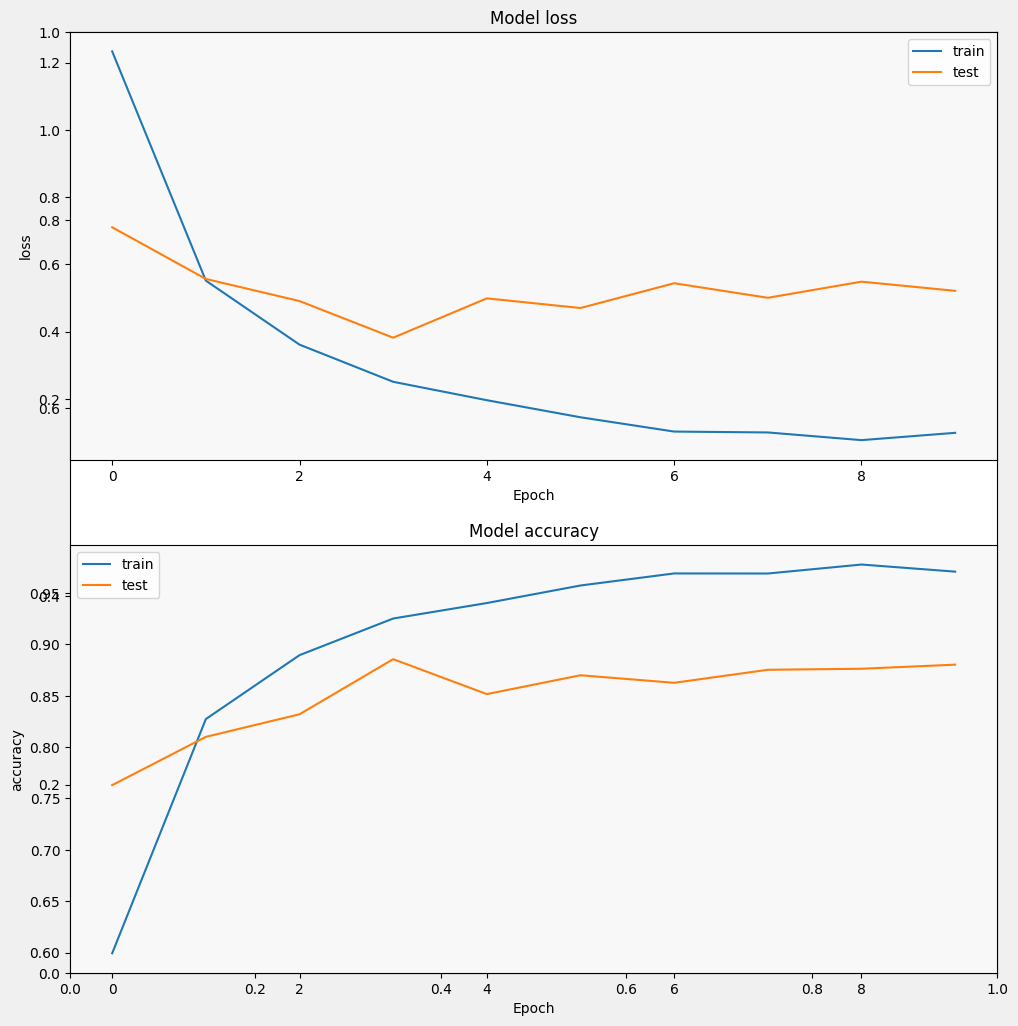

In [12]:
# Display training curves
display_training_curves(
    history_1.history['loss'],
    history_1.history['val_loss'],  # Ganti dengan test_loss jika Anda tidak menggunakan val_loss
    'loss', 211
)

display_training_curves(
    history_1.history['accuracy'],
    history_1.history['val_accuracy'],  # Ganti dengan test_accuracy jika Anda tidak menggunakan val_accuracy
    'accuracy', 212
)


## Evaluasi

In [13]:
model_1.evaluate(test_generator)  # Mengevaluasi performa model_1 terhadap data uji (test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8784 - loss: 0.4868


[0.5106567740440369, 0.8820000290870667]

In [14]:
predictions = model_1.predict(test_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step


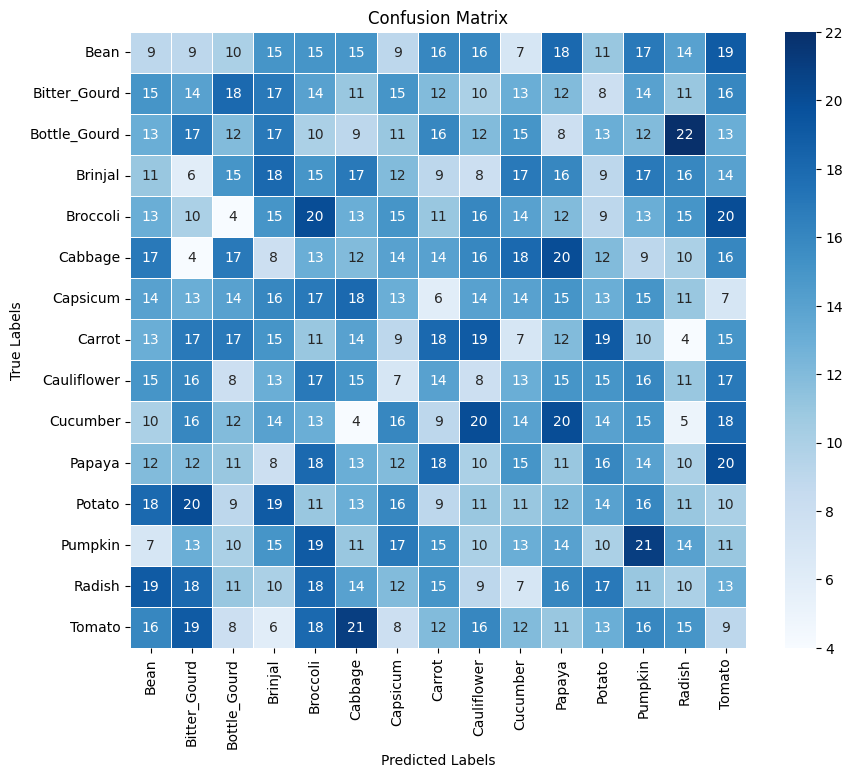

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)

# Mengambil label kelas asli dari data uji (test_generator)
y_true_class = test_generator.classes

# Membuat Confusion Matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Menampilkan Confusion Matrix menggunakan seaborn heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidths=0.5,
    square=True,
    cmap='Blues',  # Warna heatmap
    xticklabels=test_generator.class_indices.keys(),  # Menampilkan label kelas di sumbu X
    yticklabels=test_generator.class_indices.keys(),  # Menampilkan label kelas di sumbu Y
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## 2.2. Menyimpan dan Memuat Model

## Menyimpan Model dalam Format SavedModel

In [23]:
import shutil

# Membuat file zip dari folder saved_model
shutil.make_archive('/content/saved_model', 'zip', '/content/saved_model')


'/content/saved_model.zip'

## Menyimpan Model ke dalam Format TensorFlow Lite

In [25]:
# Mengonversi model ke format TensorFlow Lite (TFLite)
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
tflite_model = converter.convert()

# Menyimpan model TFLite ke dalam direktori 'content'
with open('/content/model_1.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpls8keoab'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  134968436820448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968436927200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968418266880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968418541536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968418548224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968418546464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968331357344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968331362272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968331368256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134968331470448: TensorSpec(shape=(), dtype=tf.resource, name=None)


['.config',
 'model_1.tflite',
 'vegetable-image-dataset',
 'saved_model.zip.zip',
 'saved_model.h5',
 'model.tflite',
 'saved_model.zip',
 'saved_model',
 'tfjs_model.zip.zip',
 'tfjs_model.zip',
 'my_model.keras',
 'tfjs_model',
 'sample_data']

## Menyimpan Model ke dalam Format TensorFlow.js

In [21]:
import shutil

# Membuat file zip dari folder tfjs_model
shutil.make_archive('/content/tfjs_model', 'zip', '/content/tfjs_model')


'/content/tfjs_model.zip'